Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score

import utilities as utils

Loads the datacube

In [2]:
data_aus = utils.load_dataset('data/datacube_aus.csv')
data_uscanada = utils.load_dataset('data/datacube_uscan.csv')

In [3]:
data_aus.head()

,Unnamed: 0,s2_cell_id,s2_cell_center,s2_cell_poly,GeophysicsLAB_Australia_resampled,GeophysicsMoho_Australia_resampled,GeophysicsSatelliteGravity_ShapeIndex_Australia_resampled,GeophysicsGravity_Australia,GeophysicsGravity_HGM_Australia,GeophysicsGravity_UpCont30km_Australia,...,GeophysicsMagRTP_HGM_Australia,GeophysicsMagRTP_HGMDeepSources_Australia,ShallowGravitySources_Worms_Australia,DeepGravitySources_Worms_Australia,ShallowMagSources_Worms_Australia,DeepMagSources_Worms_Australia,MVT_Deposit,MVT_Occurrence,MVT_DepositOccurrence,MVT_DepositOccurrenceNeighbors
0,0,3.039185e+18,"(115.53257966583386, -32.01562996655234)",POLYGON ((115.52073578584024 -32.0287875150602...,118.061768,NaN,NaN,-825.605896,0.013045,-521.114502,...,0.000001,57.247589,0.240333,1.229566,0.018293,0.958161,False,False,False,False
1,1,3.039185e+18,"(115.50889142213369, -31.999479960821)",POLYGON ((115.49704657613238 -32.0126371983332...,118.061768,NaN,NaN,-833.284119,0.006415,-523.206238,...,0.000002,53.333313,0.266369,1.251733,0.013119,0.979510,False,False,False,False
2,2,3.039185e+18,"(115.50889142213369, -32.02071387573413)",POLYGON ((115.49704657613238 -32.0338700644866...,118.061768,NaN,NaN,-824.456604,0.010581,-521.427124,...,0.000002,53.519596,0.260465,1.248645,0.007821,0.968329,False,False,False,False
3,3,3.039191e+18,"(115.65099154987016, -32.15978364725093)",POLYGON ((115.63915258490901 -32.1729395091806...,NaN,NaN,NaN,-701.191284,0.012779,-478.086945,...,0.000002,74.140808,0.141208,1.077208,0.070790,0.763127,False,False,False,False
4,4,3.039193e+18,"(115.65099154987016, -32.18097103069401)",POLYGON ((115.63915258490901 -32.1941258138235...,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000002,73.828674,0.135218,1.060909,0.055533,0.749562,False,False,False,False


In [4]:
data_uscanada.head()

,Unnamed: 0,s2_cell_id,s2_cell_center,s2_cell_poly,GeophysicsLAB_USCanada_resampled,USCanada_Moho_resampled,GeophysicsSatelliteGravity_ShapeIndex_USCanada_resampled,GeophysicsGravity_USCanada_resampled,GeophysicsGravity_HGM_USCanada_resampled,GeophysicsGravity_Up30km_USCanada_resampled,...,GeophysicsMag_RTP_HGM_USCanada,USCanadaMagRTP_HGMDeepSources_resampled,ShallowGravitySources_Worms_USCanada,DeepGravitySources_Worms_USCanada,ShallowMagSources_Worms_USCanada,DeepMagSources_Worms_USCanada,MVT_Deposit,MVT_Occurrence,MVT_DepositOccurrence,MVT_DepositOccurrenceNeighbors
0,189366,5.407508e+18,"(-52.77455720096285, 47.79014133427333)",POLYGON ((-52.75017029782352 47.79235272322585...,167.463120,36.951546,NaN,-14.628869,0.000478,54.152386,...,NaN,0.000008,0.018078,0.467800,3.228916,0.853046,False,False,False,False
1,189367,5.407508e+18,"(-52.79668480860249, 47.775641586895475)",POLYGON ((-52.772308984340135 47.7778586350250...,167.488510,36.919262,NaN,-14.040462,0.000522,54.074169,...,NaN,0.000008,0.013551,0.445168,3.208828,0.860267,False,False,False,False
2,189368,5.407510e+18,"(-52.81427963585849, 47.7365941993138)",POLYGON ((-52.789928484457185 47.7388146935553...,167.494629,36.846821,NaN,-12.965734,0.000470,54.094131,...,NaN,0.000008,0.033144,0.405177,3.197183,0.894622,False,False,False,False
3,189369,5.407511e+18,"(-52.787679290472134, 47.72654503197568)",POLYGON ((-52.763330665519334 47.7287576848285...,167.476807,36.836014,NaN,-13.936182,0.000625,54.253563,...,NaN,0.000008,0.013926,0.411710,3.222897,0.910793,False,False,False,False
4,189370,5.407511e+18,"(-52.765573065990225, 47.74102844443887)","POLYGON ((-52.74121339274432 47.7432354490161,...",167.448700,36.853645,NaN,-14.631838,0.000518,54.302921,...,NaN,0.000008,0.014034,0.435728,3.242150,0.902150,False,False,False,False


In [5]:
data_aus.rename({'GeophysicsLAB_Australia_resampled' : 'GeophysicsLAB',
                    'GeophysicsMoho_Australia_resampled' : 'GeophysicsMoho',
                    'GeophysicsSatelliteGravity_ShapeIndex_Australia_resampled' : 'GeophysicsSatelliteGravity_ShapeIndex',
                    'GeophysicsGravity_Australia' : 'GeophysicsGravity', 
                    'GeophysicsGravity_HGM_Australia' : 'GeophysicsGravity_HGM',
                    'GeophysicsGravity_UpCont30km_Australia' : 'GeophysicsGravity_UpCont30km',
                    'GeophysicsGravity_UpCont30km_HGM_Australia' : 'GeophysicsGravity_UpCont30km_HGM',
                    'GeophysicsMagRTP_Australia' : 'GeophysicsMagRTP', 
                    'GeophysicsMagRTP_DeepSources_Australia' : 'GeophysicsMagRTP_DeepSources',
                    'GeophysicsMagRTP_VD_Australia' : 'GeophysicsMagRTP_VD',
                    'GeophysicsMagRTP_HGM_Australia' : 'GeophysicsMagRTP_HGM',
                    'GeophysicsMagRTP_HGMDeepSources_Australia' : 'GeophysicsMagRTP_HGMDeepSources',
                    'ShallowGravitySources_Worms_Australia' : 'ShallowGravitySources_Worms',
                    'DeepGravitySources_Worms_Australia' : 'DeepGravitySources_Worms',
                    'ShallowMagSources_Worms_Australia' : 'ShallowMagSources_Worms', 
                    'DeepMagSources_Worms_Australia' : 'DeepMagSources_Worms'}, 
                axis=1, inplace=True)
data_aus.drop(columns=['Unnamed: 0'], inplace=True)

data_uscanada.rename({'GeophysicsLAB_USCanada_resampled' : 'GeophysicsLAB', 
                        'USCanada_Moho_resampled' : 'GeophysicsMoho',
                        'GeophysicsSatelliteGravity_ShapeIndex_USCanada_resampled' : 'GeophysicsSatelliteGravity_ShapeIndex',
                        'GeophysicsGravity_USCanada_resampled' : 'GeophysicsGravity',
                        'GeophysicsGravity_HGM_USCanada_resampled' : 'GeophysicsGravity_HGM',
                        'GeophysicsGravity_Up30km_USCanada_resampled' : 'GeophysicsGravity_UpCont30km',
                        'GeophysicsGravity_Up30km_HGM_USCanada_resampled' : 'GeophysicsGravity_UpCont30km_HGM',
                        'GeophysicsMag_RTP_USCanada' : 'GeophysicsMagRTP', 
                        'USCanadaMagRTP_DeepSources_resampled' : 'GeophysicsMagRTP_DeepSources',
                        'GeophysicsMag_RTP_VD_USCanada' : 'GeophysicsMagRTP_VD',
                        'GeophysicsMag_RTP_HGM_USCanada' : 'GeophysicsMagRTP_HGM',
                        'USCanadaMagRTP_HGMDeepSources_resampled' : 'GeophysicsMagRTP_HGMDeepSources',
                        'ShallowGravitySources_Worms_USCanada' : 'ShallowGravitySources_Worms',
                        'DeepGravitySources_Worms_USCanada' : 'DeepGravitySources_Worms', 
                        'ShallowMagSources_Worms_USCanada' : 'ShallowMagSources_Worms',
                        'DeepMagSources_Worms_USCanada' : 'DeepMagSources_Worms'}, 
                axis=1, inplace=True)
data_uscanada.drop(columns=['Unnamed: 0'], inplace=True)

Selects the data /labels used for MVT WOE baseline

In [6]:
data = pd.concat((data_aus, data_uscanada), ignore_index = True)
data.reset_index(drop=True, inplace=True)
data['Lat'] = data['s2_cell_center'].apply(lambda x: float(x.rsplit(',',1)[1][:-1]))
data['Lng'] = data['s2_cell_center'].apply(lambda x: float(x.rsplit(',',1)[0][1:]))
data.dtypes

s2_cell_id                               float64
s2_cell_center                            object
s2_cell_poly                              object
GeophysicsLAB                            float64
GeophysicsMoho                           float64
GeophysicsSatelliteGravity_ShapeIndex    float64
GeophysicsGravity                        float64
GeophysicsGravity_HGM                    float64
GeophysicsGravity_UpCont30km             float64
GeophysicsGravity_UpCont30km_HGM         float64
GeophysicsMagRTP                         float64
GeophysicsMagRTP_DeepSources             float64
GeophysicsMagRTP_VD                      float64
GeophysicsMagRTP_HGM                     float64
GeophysicsMagRTP_HGMDeepSources          float64
ShallowGravitySources_Worms              float64
DeepGravitySources_Worms                 float64
ShallowMagSources_Worms                  float64
DeepMagSources_Worms                     float64
MVT_Deposit                                 bool
MVT_Occurrence      

In [7]:
cols_dict = {
            's2_cell_id' : None,                                        # Polygon with coordinates of the vertices
            'GeophysicsLAB' : None,                                     # Depth to LAB
            'GeophysicsMoho' : None,                                    # Depth to Moho
            'GeophysicsSatelliteGravity_ShapeIndex' : None,             # Sattelite Gravity
            'GeophysicsGravity' : None,                                 # Gravity Bouger
            'GeophysicsGravity_HGM' : None,                             # Gravity HGM
            'GeophysicsGravity_UpCont30km_HGM' : None,                  # Gravity upward cont'd HGM
            'ShallowGravitySources_Worms' : None,                       # Gravity worms
            'DeepGravitySources_Worms' : None,                          # Gravity upward cont'd worms
            'GeophysicsMagRTP_HGM' : None,                              # Magnetic HGM
            'GeophysicsMagRTP_HGMDeepSources' : None,                   # Magnetic long-wavelength HGM
            'ShallowMagSources_Worms' : None,                           # Magnetic worms
            'DeepMagSources_Worms' : None,                              # Magnetic long-wavelength worms
            'MVT_Deposit' : None,
            'MVT_Occurrence' : None,
            'MVT_DepositOccurrence' : None,
            'MVT_DepositOccurrenceNeighbors' : None,
        }

data_filtered, cols = utils.extract_cols(data, cols_dict)

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5660936 entries, 0 to 5660935
Data columns (total 17 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   s2_cell_id                             float64
 1   GeophysicsLAB                          float64
 2   GeophysicsMoho                         float64
 3   GeophysicsSatelliteGravity_ShapeIndex  float64
 4   GeophysicsGravity                      float64
 5   GeophysicsGravity_HGM                  float64
 6   GeophysicsGravity_UpCont30km_HGM       float64
 7   ShallowGravitySources_Worms            float64
 8   DeepGravitySources_Worms               float64
 9   GeophysicsMagRTP_HGM                   float64
 10  GeophysicsMagRTP_HGMDeepSources        float64
 11  ShallowMagSources_Worms                float64
 12  DeepMagSources_Worms                   float64
 13  MVT_Deposit                            bool   
 14  MVT_Occurrence                         bool   
 15

In [8]:
print(data_filtered['MVT_Deposit'].value_counts(), '\n')
print(data_filtered['MVT_Occurrence'].value_counts(), '\n')
print(data_filtered['MVT_DepositOccurrence'].value_counts(), '\n')
print(data_filtered['MVT_DepositOccurrenceNeighbors'].value_counts(), '\n')

MVT_Deposit
False    5660766
True         170
Name: count, dtype: int64 

MVT_Occurrence
False    5658112
True        2824
Name: count, dtype: int64 

MVT_DepositOccurrence
False    5658006
True        2930
Name: count, dtype: int64 

MVT_DepositOccurrenceNeighbors
False    5646832
True       14104
Name: count, dtype: int64 



In [9]:
labels_filtered = data_filtered['MVT_DepositOccurrenceNeighbors']
data_filtered = data_filtered.drop(columns=['s2_cell_id', 'MVT_Deposit', 'MVT_Occurrence', 'MVT_DepositOccurrence', 'MVT_DepositOccurrenceNeighbors'])
cols = cols[1:-4]

Clearly the dataset has MANY outliers, as reported in the paper

/home/local/SRI/e35547/.conda/envs/cmaas-pp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/local/SRI/e35547/.conda/envs/cmaas-pp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/local/SRI/e35547/.conda/envs/cmaas-pp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/local/SRI/e35547/.conda/envs/cmaas-pp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

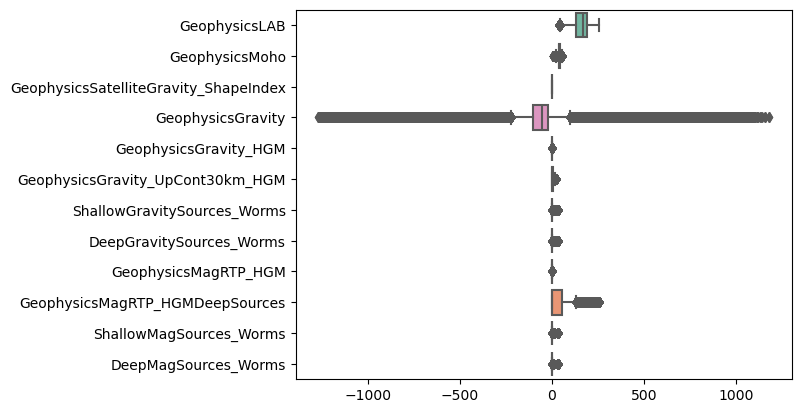

In [10]:
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")

We can remove these outliers

/home/local/SRI/e35547/.conda/envs/cmaas-pp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/local/SRI/e35547/.conda/envs/cmaas-pp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/local/SRI/e35547/.conda/envs/cmaas-pp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/local/SRI/e35547/.conda/envs/cmaas-pp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

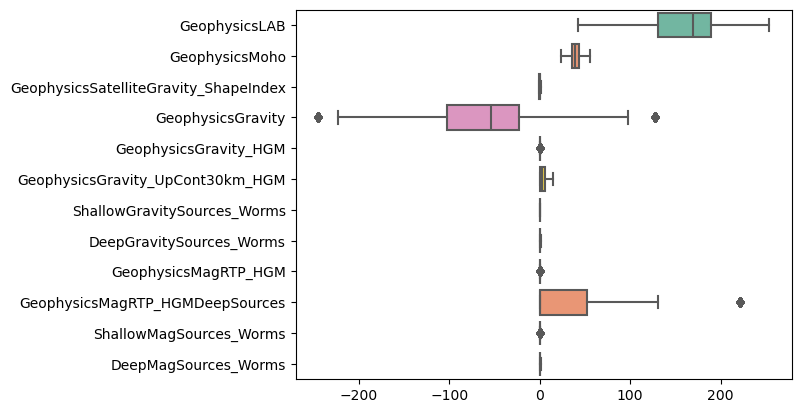

In [11]:
data_filtered = utils.tukey_remove_outliers(data_filtered)
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")

There are also many NaNs in the data, these can be "imputed" with the mean value.

In [12]:
print(data_filtered.isna().sum())

GeophysicsLAB                            113010
GeophysicsMoho                            12230
GeophysicsSatelliteGravity_ShapeIndex    103141
GeophysicsGravity                         60816
GeophysicsGravity_HGM                     60816
GeophysicsGravity_UpCont30km_HGM          60816
ShallowGravitySources_Worms              112561
DeepGravitySources_Worms                 112561
GeophysicsMagRTP_HGM                     380501
GeophysicsMagRTP_HGMDeepSources          249900
ShallowMagSources_Worms                  112561
DeepMagSources_Worms                     112561
dtype: int64


In [13]:
data_filtered = utils.impute_nans(data_filtered)
print(data_filtered.isna().sum())

GeophysicsLAB                            0
GeophysicsMoho                           0
GeophysicsSatelliteGravity_ShapeIndex    0
GeophysicsGravity                        0
GeophysicsGravity_HGM                    0
GeophysicsGravity_UpCont30km_HGM         0
ShallowGravitySources_Worms              0
DeepGravitySources_Worms                 0
GeophysicsMagRTP_HGM                     0
GeophysicsMagRTP_HGMDeepSources          0
ShallowMagSources_Worms                  0
DeepMagSources_Worms                     0
dtype: int64


Finally, it can be observed the above data is not "normalized", we should make features standard scores / z-scores

/home/local/SRI/e35547/.conda/envs/cmaas-pp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/local/SRI/e35547/.conda/envs/cmaas-pp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/local/SRI/e35547/.conda/envs/cmaas-pp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/local/SRI/e35547/.conda/envs/cmaas-pp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

(note remaining outliers above were within the Tukey fences calculated over ALL the data)


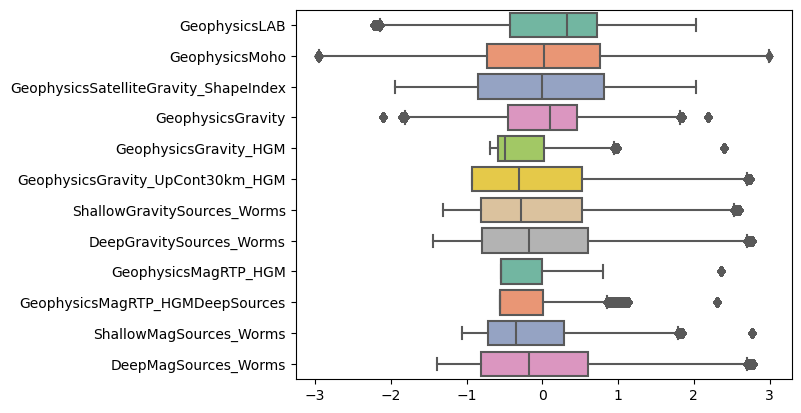

In [14]:
data_filtered = utils.normalize_df(data_filtered)
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")
print("(note remaining outliers above were within the Tukey fences calculated over ALL the data)")

Discretizes the continuous variables in 5 bins

In [15]:
nbins = 5
for col in cols:
    data_filtered[col] = pd.qcut(data_filtered[col], nbins)
data_filtered["target"] = labels_filtered

Forms the train / test splits

In [16]:
data_filtered["Latitude_EPSG4326"] = data["Lat"]
data_filtered["Training_MVT_Deposit"] = data["MVT_Deposit"]
te_df, tr_df, _ = utils.get_spatial_cross_val_idx(data_filtered, test_set=1, split_col="Training_MVT_Deposit", nbins=36)
tr_df = tr_df.drop(columns=["Training_MVT_Deposit"])
te_df = te_df.drop(columns=["Training_MVT_Deposit"])

# test_set = 1 closest split counts in paper
print(f"Train counts: {tr_df['target'].value_counts()}")
print(f"Test counts: {te_df['target'].value_counts()}")

Train counts: target
False    3836300
True       12525
Name: count, dtype: int64
Test counts: target
False    1810532
True        1579
Name: count, dtype: int64


Computes WOE / IV for each variable based on the training dataset

In [17]:
lst = []
IV_df = pd.DataFrame(columns=['Variable','IV'])
for col in cols:
    df, iv = utils.calculate_woe_iv(tr_df, col, 'target')
    lst.append(df)
    IV_df = pd.concat([IV_df, pd.DataFrame([{"Variable": col ,"IV": iv,}])], ignore_index=True)

/tmp/ipykernel_31136/2459121460.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  IV_df = pd.concat([IV_df, pd.DataFrame([{"Variable": col ,"IV": iv,}])], ignore_index=True)


In [18]:
# shows the overall IV for all variables on MVT deposits/occurences
print(f"Information Value Overview:\n{IV_df.sort_values('IV', ascending=False)}\n\n\n")

Information Value Overview:
                                 Variable        IV
0                           GeophysicsLAB  0.877660
5        GeophysicsGravity_UpCont30km_HGM  0.562704
1                          GeophysicsMoho  0.461497
9         GeophysicsMagRTP_HGMDeepSources  0.294675
3                       GeophysicsGravity  0.290192
2   GeophysicsSatelliteGravity_ShapeIndex  0.167814
11                   DeepMagSources_Worms  0.140524
8                    GeophysicsMagRTP_HGM  0.108476
4                   GeophysicsGravity_HGM  0.096498
6             ShallowGravitySources_Worms  0.020611
7                DeepGravitySources_Worms  0.014685
10                ShallowMagSources_Worms  0.007615





Merge the WOE data into the existig input datacube

In [19]:
# gets the WOE for all variables on MVT deposits/occurences
tr_result = tr_df
te_result = te_df
all_result = pd.concat([tr_result, te_result])
for i, col in enumerate(cols):
    col_data = lst[i]
    col_data = col_data.rename(columns={"Value":col, "WoE":f"{col}_WoE", "IV":f"{col}_IV"})
    tr_result = pd.merge(tr_result, col_data[[col, f"{col}_WoE", f"{col}_IV"]], on=col)
    te_result = pd.merge(te_result, col_data[[col, f"{col}_WoE", f"{col}_IV"]], on=col)
    all_result = pd.merge(all_result, col_data[[col, f"{col}_WoE", f"{col}_IV"]], on=col)

Combines the WOE for each comlumn

In [20]:
tr_result["WOE Total"] = tr_result.loc[:,[f"{col}_WoE" for col in cols]].sum(axis=1)
te_result["WOE Total"] = te_result.loc[:,[f"{col}_WoE" for col in cols]].sum(axis=1)
all_result["WOE Total"] = all_result.loc[:,[f"{col}_WoE" for col in cols]].sum(axis=1)

In [21]:
auc_score = roc_auc_score(tr_result["target"],tr_result["WOE Total"])
print(f"Train AUC score:{auc_score}")
auc_score = roc_auc_score(te_result["target"],te_result["WOE Total"])
print(f"Test AUC score:{auc_score}")
auc_score = roc_auc_score(all_result["target"],all_result["WOE Total"])
print(f"All AUC score:{auc_score}")

Train AUC score:0.7952075001991429
Test AUC score:0.8050642166404447
All AUC score:0.8100884811725919
